<a href="https://colab.research.google.com/github/wiroel/my-repo/blob/main/power_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Power Transformer(performs better than function transformer)
Box-Cox Transformer
-aim(for normal distribution).  
-range(value of lambda{-5 to 5})


Yeo-Johnson- somewhat variation of Box-Cox, can be applied to -ve numbers

(lambda applied through maximum likelihood)

here, standardized default=True, sono need to apply StandardScalar


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
file_path = '/content/drive/MyDrive/Concrete Compressive Strength.csv'
df = pd.read_csv(file_path)

df.head(5)

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [75]:
df.shape

(1030, 9)

In [76]:
df.isnull().sum()

,0
Cement,0
Blast_Furnance_Slag,0
Fly_Ash,0
Water,0
Superplasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age_Day,0
Concrete_Strength,0


In [77]:
df.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [78]:
X = df.iloc[:, 0:8]
y = df.iloc[:, -1]

In [79]:
print(X)

      Cement  Blast_Furnance_Slag  Fly_Ash  Water  Superplasticizer  \
0      540.0                  0.0      0.0  162.0               2.5   
1      540.0                  0.0      0.0  162.0               2.5   
2      332.5                142.5      0.0  228.0               0.0   
3      332.5                142.5      0.0  228.0               0.0   
4      198.6                132.4      0.0  192.0               0.0   
...      ...                  ...      ...    ...               ...   
1025   276.4                116.0     90.3  179.6               8.9   
1026   322.2                  0.0    115.6  196.0              10.4   
1027   148.5                139.4    108.6  192.7               6.1   
1028   159.1                186.7      0.0  175.6              11.3   
1029   260.9                100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age_Day  
0               1040.0           676.0       28  
1               1055.0           676.0       28

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275416055429022

In [82]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=5))

np.float64(0.4610685474070424)

In [83]:
X_train.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day
995,158.60,148.90,116.00,175.10,15.00,953.3,719.70,28
507,424.00,22.00,132.00,178.00,8.48,822.0,750.00,28
334,275.07,0.00,121.35,159.48,9.90,1053.6,777.50,3
848,252.00,97.00,76.00,194.00,8.00,835.0,821.00,28
294,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,3


<ipython-input-84-a0bc28a2619f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-84-a0bc28a2619f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-84-a0bc28a2619f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed 

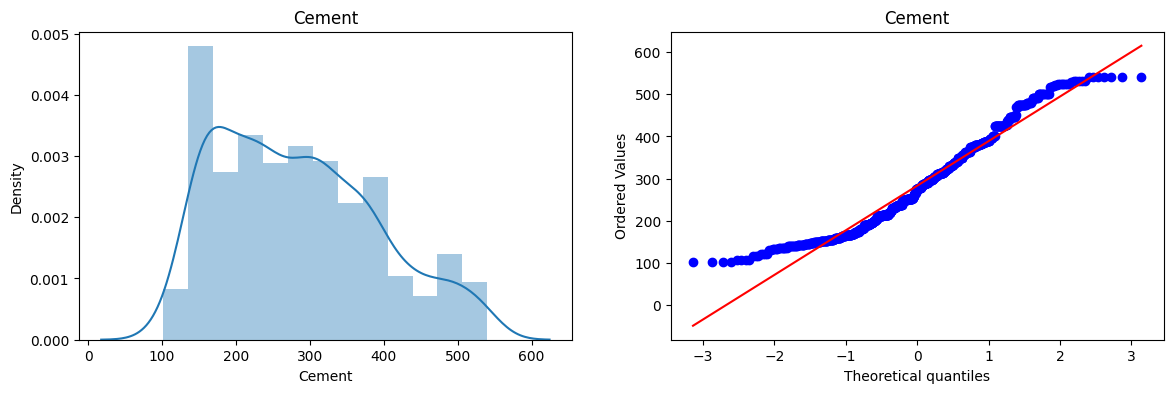

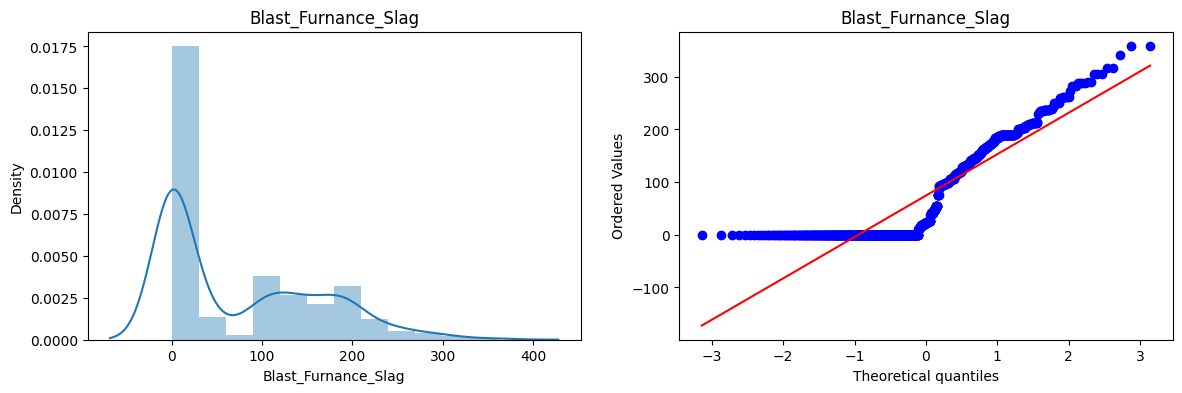

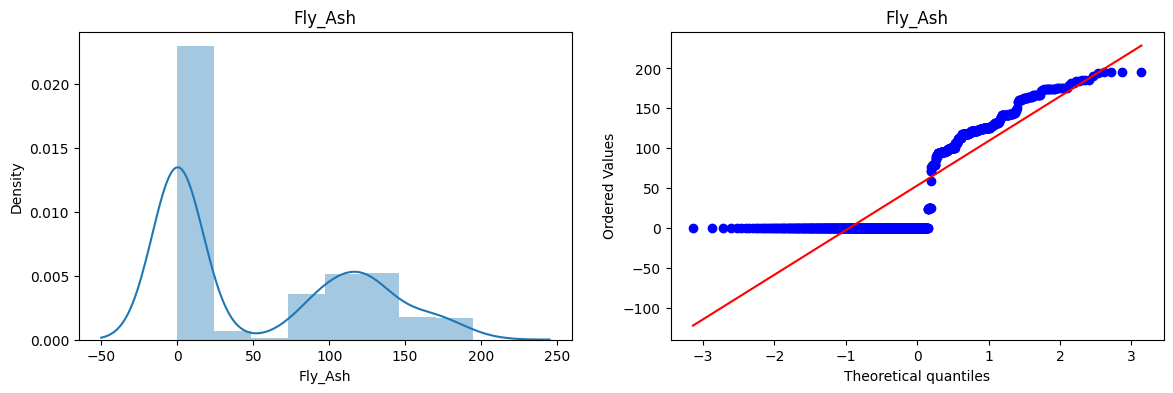

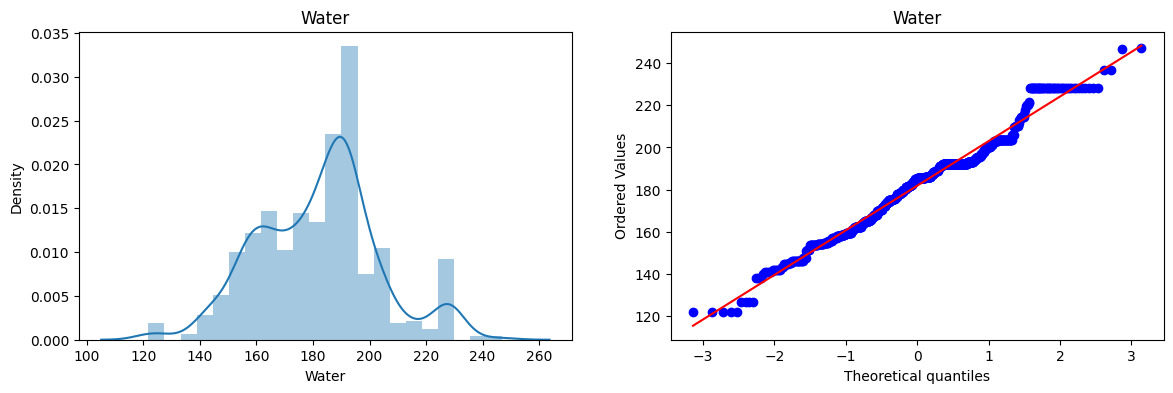

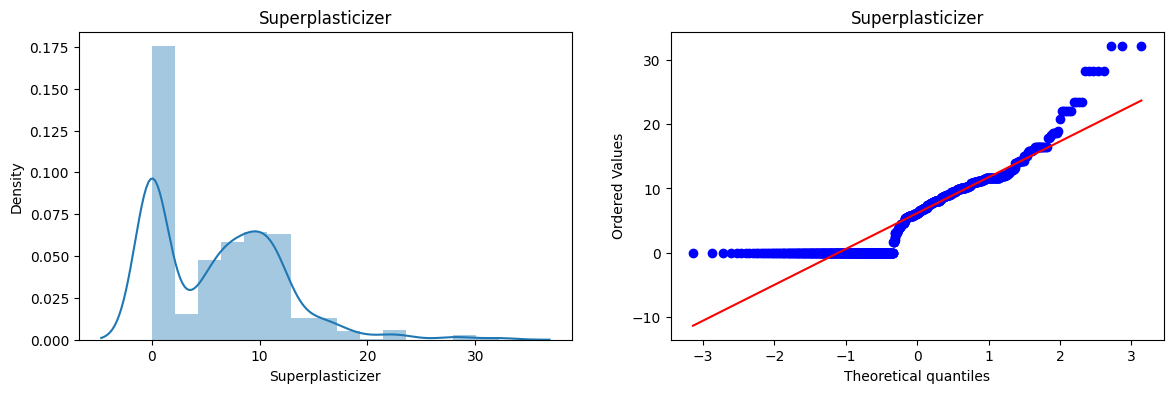

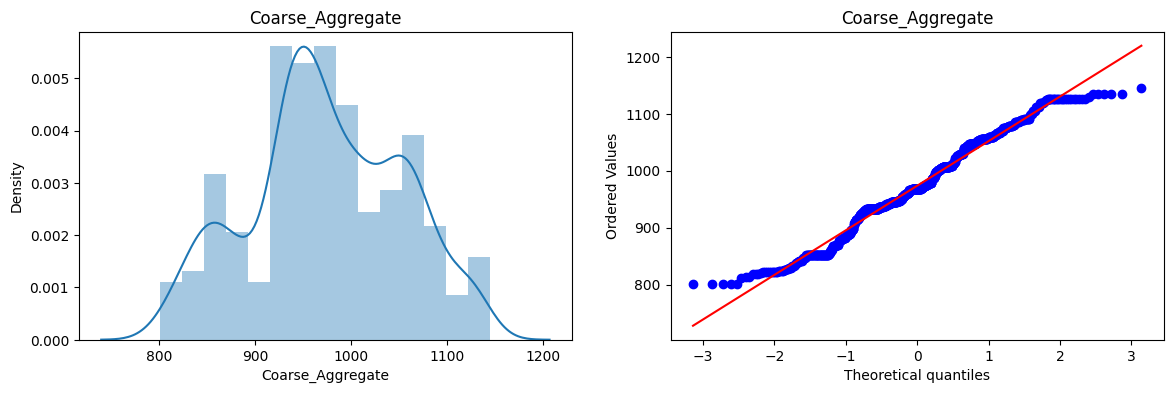

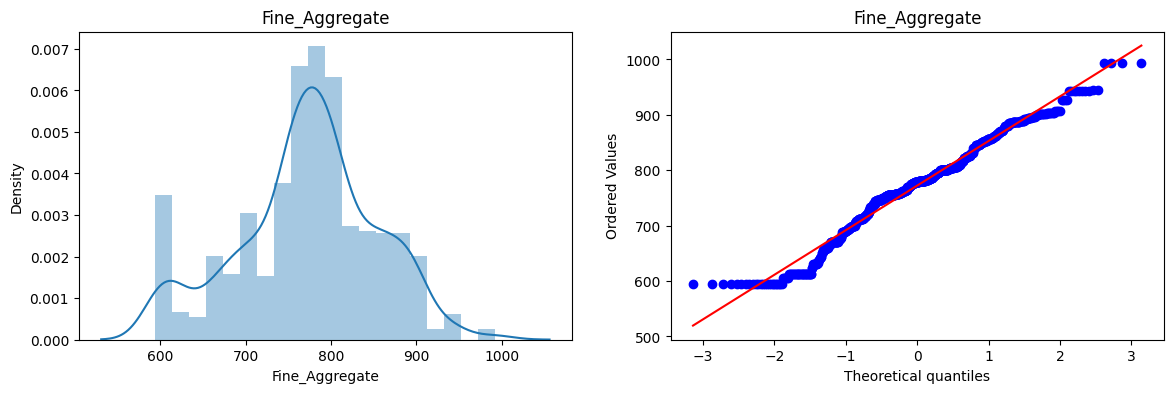

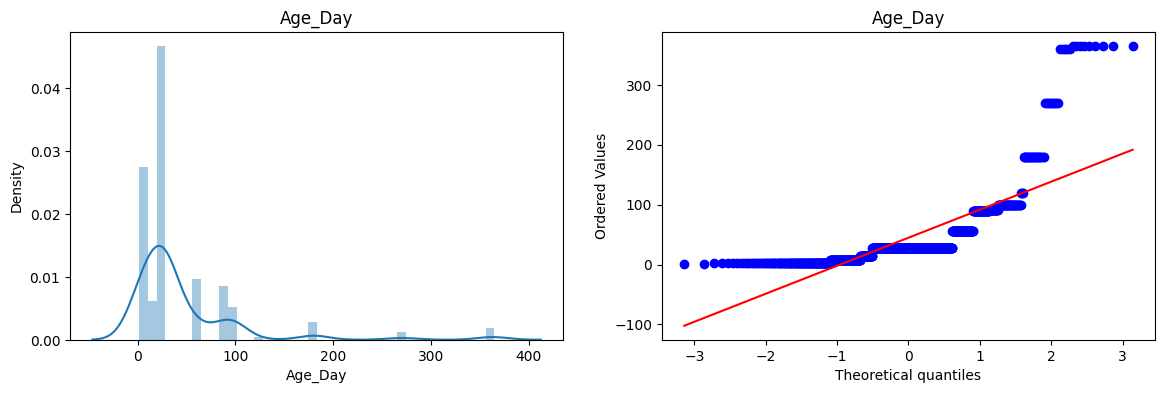

In [84]:
for col in X_train.columns:

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col], dist='norm', plot=plt)
  plt.title(col)

## Applying Box-Cox

In [85]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.0000001)       #here, 0.000001 is added because df has some 'Zero' values and boxcox doesnt work on null and -ve values
X_test_transformed= pt.fit_transform(X_test+0.0000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.215524
1,Blast_Furnance_Slag,0.025140
2,Fly_Ash,-0.005774
3,Water,0.959097
4,Superplasticizer,0.091031
5,Coarse_Aggregate,1.192465
6,Fine_Aggregate,1.973713
7,Age_Day,-0.014692


It works like cement value eg- 130 then lambda value 0.21 then final= 130^0.21 to all the values of each columns according to their lambda values



In [86]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.8056482880828963

In [87]:
pt = PowerTransformer(method='box-cox')

X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2', cv=5))

np.float64(0.6685879886077409)

In [88]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

<ipython-input-89-77107616f666>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-89-77107616f666>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
<ipython-input-89-77107616f666>:5: UserWarning: 

`distplot` is a deprecated function and will

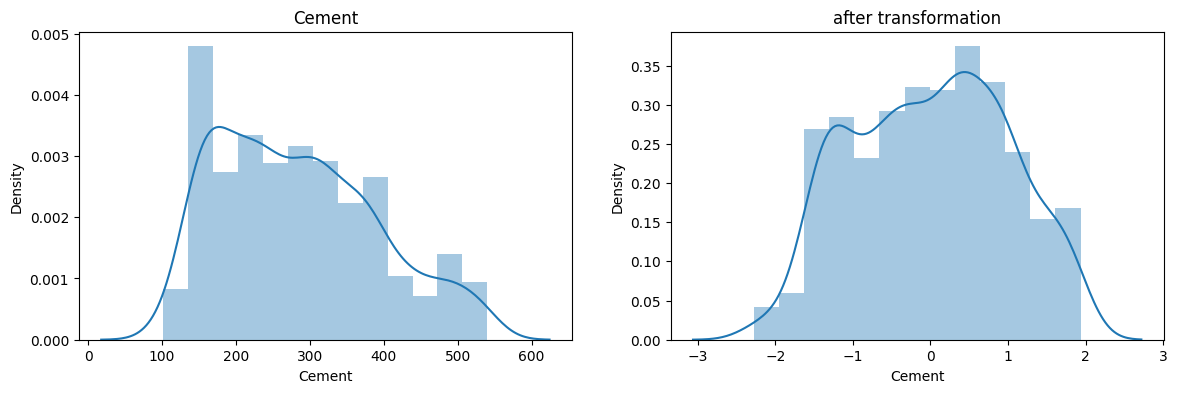

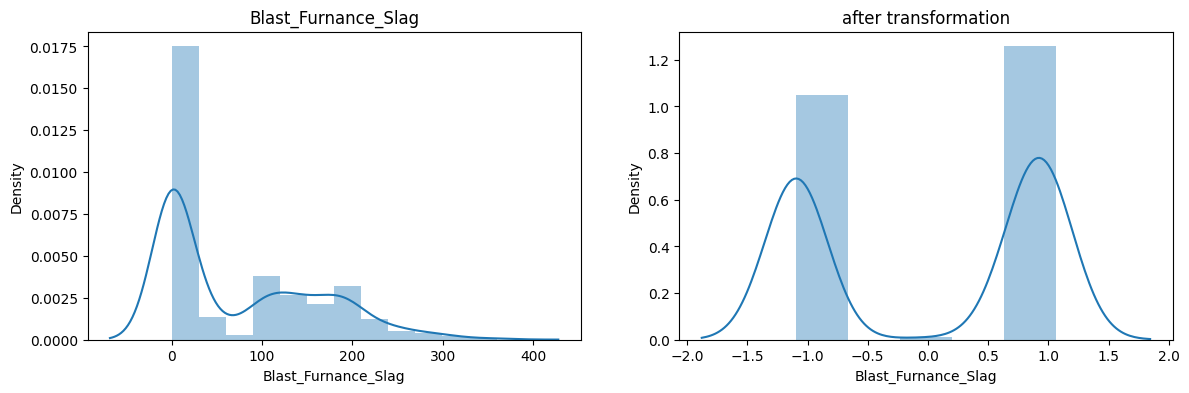

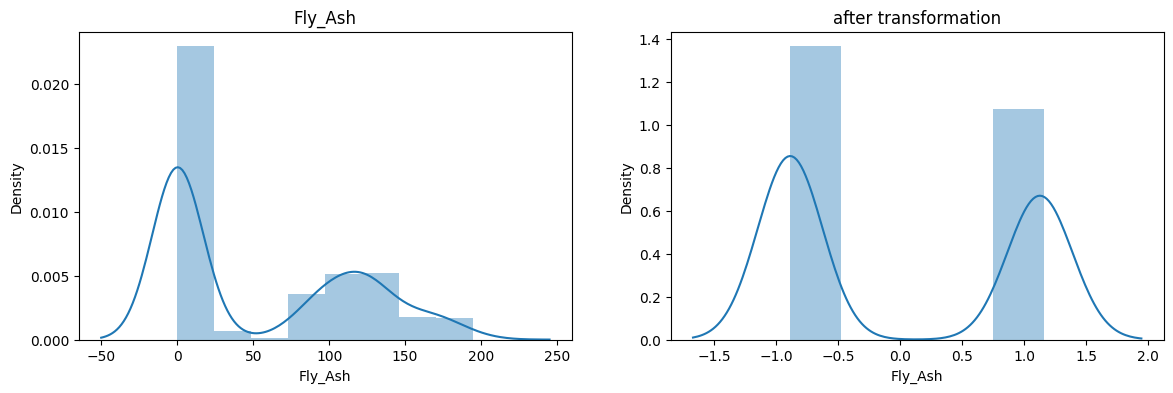

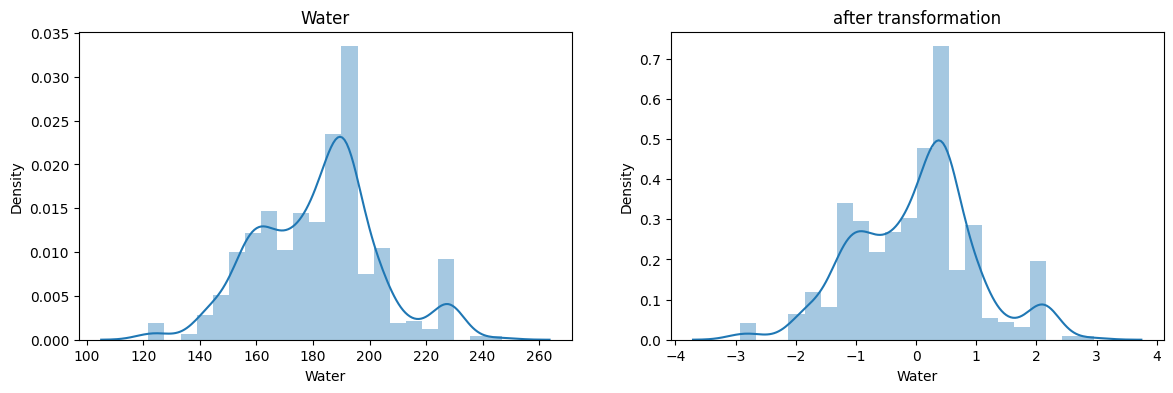

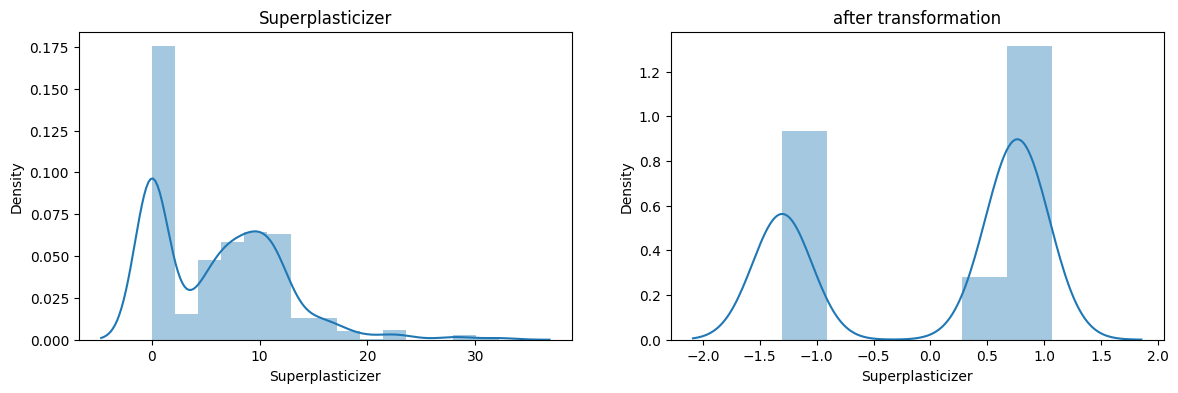

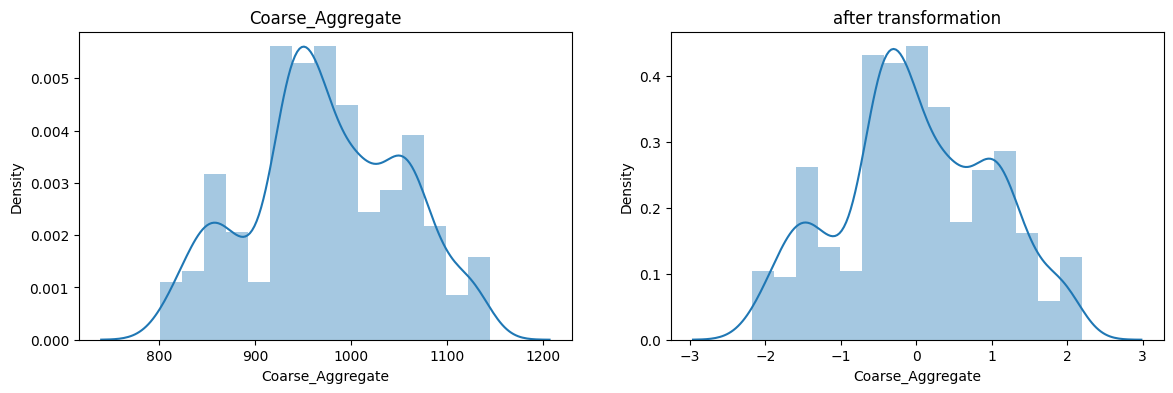

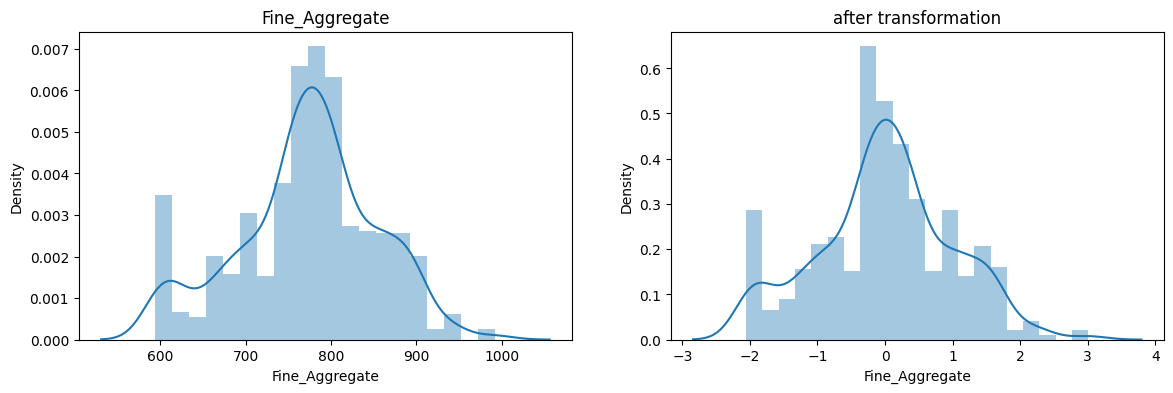

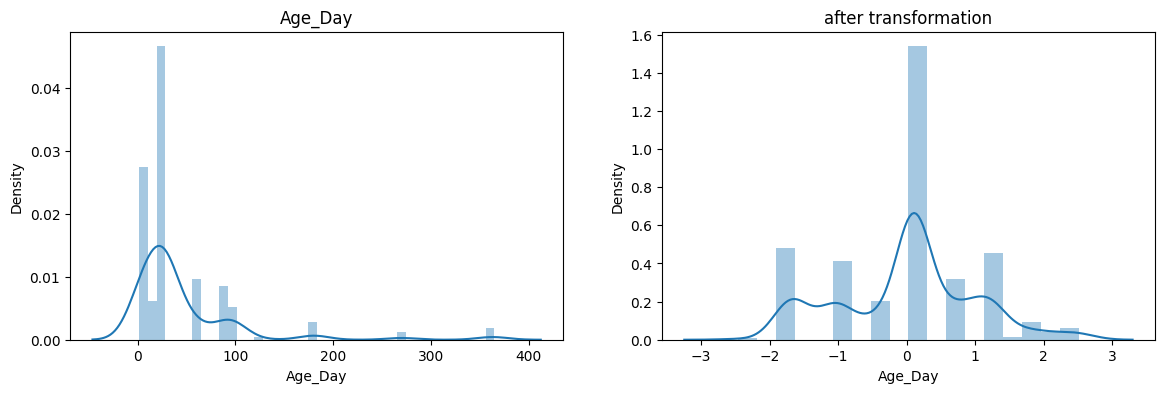

In [89]:
for col in X_train_transformed.columns:

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title('after transformation')

## Yeo-Johnson

In [90]:
pt2 = PowerTransformer()

In [91]:
X_train_transformed2=pt2.fit_transform(X_train)
X_test_transformed2= pt2.fit_transform(X_test)

lr = LinearRegression()

lr.fit(X_train_transformed2, y_train)
y_pred2 = lr.predict(X_test_transformed2)

r2_score(y_test, y_pred2)

pd.DataFrame({'cols': X_train.columns, "yeo_johnson_lambdas":pt2.lambdas_})

,cols,yeo_johnson_lambdas
0,Cement,0.212947
1,Blast_Furnance_Slag,0.020478
2,Fly_Ash,-0.038222
3,Water,0.958971
4,Superplasticizer,0.305066
5,Coarse_Aggregate,1.192724
6,Fine_Aggregate,1.975017
7,Age_Day,-0.062443


In [92]:
pt2= PowerTransformer()
X_transformed2 = pt2.fit_transform(X)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2', cv=5))


np.float64(0.6834749600888994)

In [93]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

<ipython-input-94-a36e39ef534e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-94-a36e39ef534e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])
<ipython-input-94-a36e39ef534e>:4: UserWarning: 

`distplot` is a deprecated function and wil

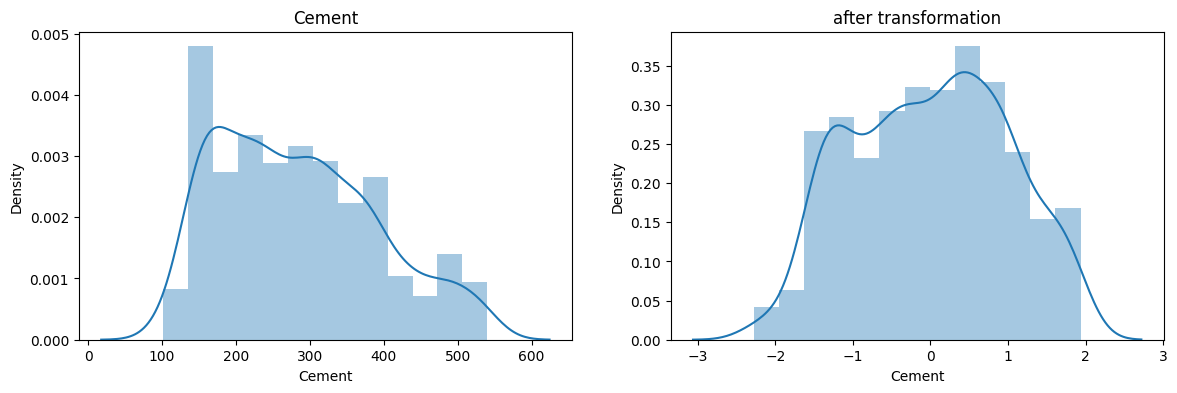

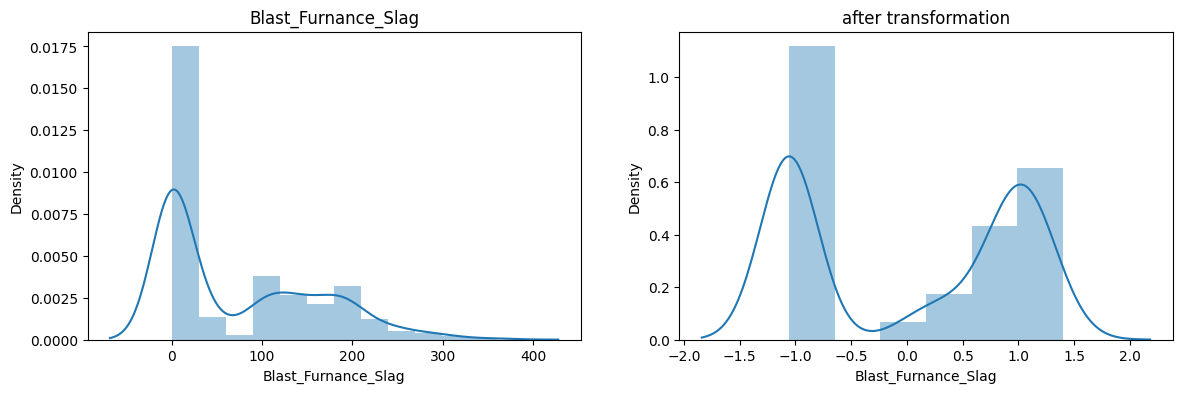

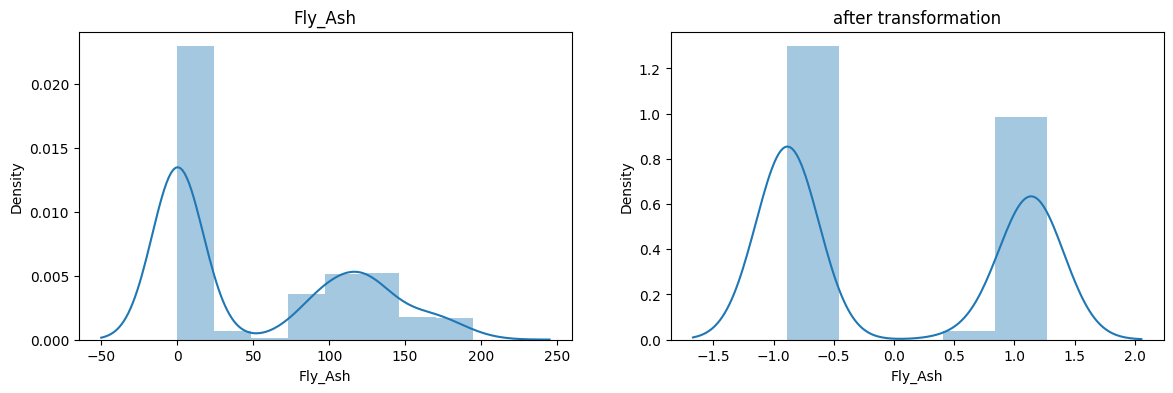

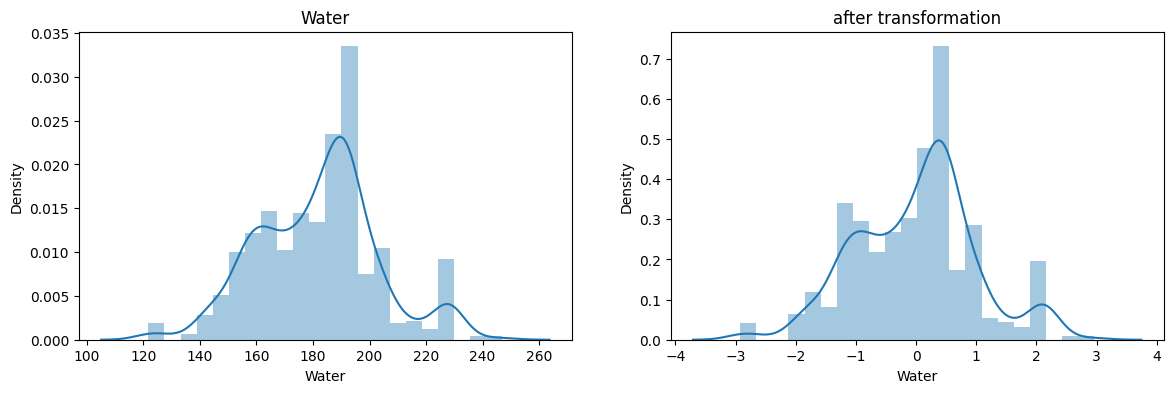

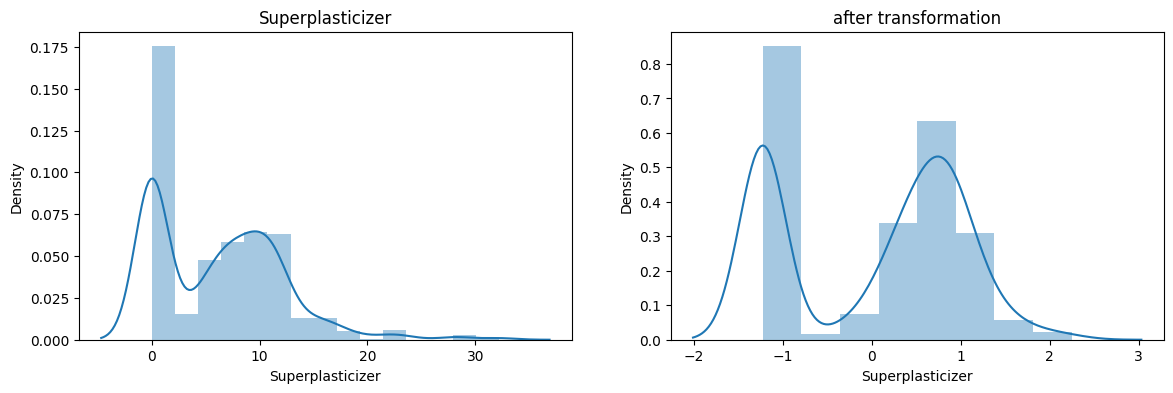

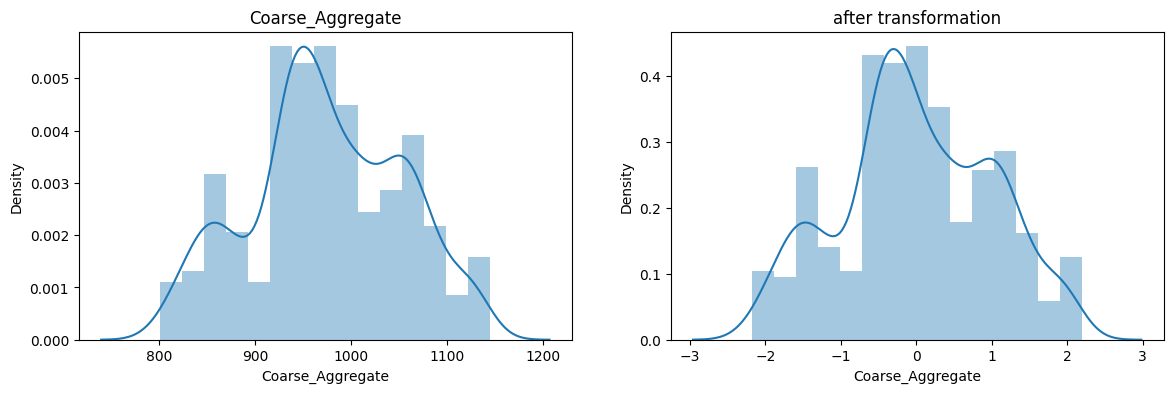

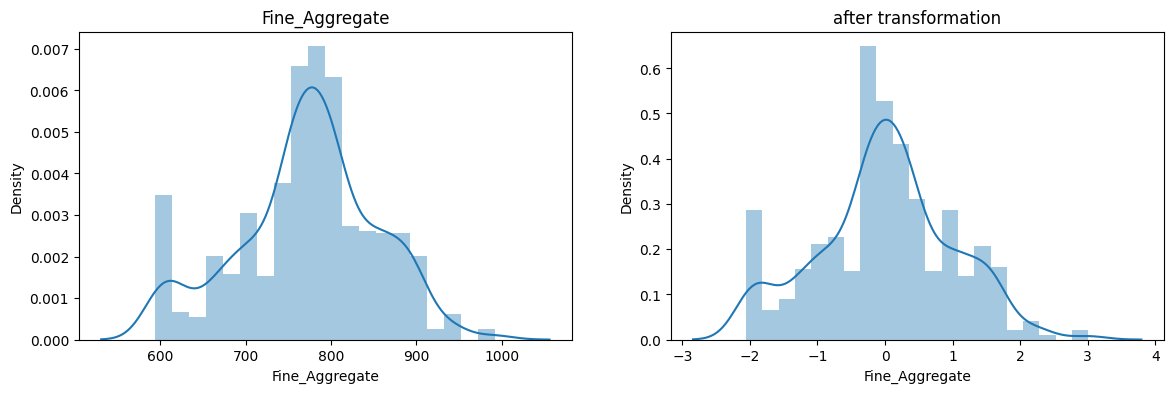

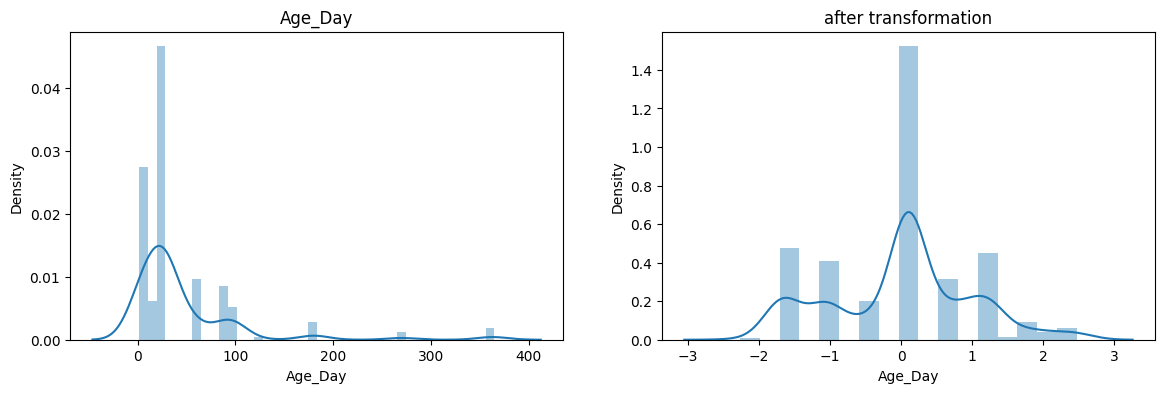

In [94]:
for col in X_train_transformed2.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed2[col])
  plt.title('after transformation')

## comparing lambdas from Box-Cox and Yeo_Johnson

In [95]:
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas': pt.lambdas_, 'yeo_johnson_lambdas': pt2.lambdas_})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.172204,0.169477
1,Blast_Furnance_Slag,0.024505,0.016630
2,Fly_Ash,-0.028797,-0.136482
3,Water,0.810542,0.809417
4,Superplasticizer,0.087912,0.263927
5,Coarse_Aggregate,1.129097,1.129325
6,Fine_Aggregate,1.829523,1.830661
7,Age_Day,0.048975,0.001771
